In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data7size20.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [5]:
np.save("X_train",np.array(X_train))
np.save("X_val",np.array(X_val))
np.save("X_test",np.array(X_test))
np.save("y_train",np.array(y_train))
np.save("y_val",np.array(y_val))
np.save("y_test",np.array(y_test))

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),7),to_categorical((np.array(y_val)),7),to_categorical((np.array(y_test)),7)

In [4]:
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build():
    size = 64
    factor=1e-5
    model = models.Sequential()
    model.add(layers.Conv2D(8, (5, 5), activation='relu', kernel_regularizer=l2(factor),input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(16, (5, 5), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(factor)))
    model.add(layers.Dense(128, activation='relu',kernel_regularizer=l2(factor)))
    
    model.add(layers.Dense(7, activation='softmax'))
    #model.summary()
    return model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
model = model_build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          1

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2
import datetime
#model = model_build(1e-5, 0.3)
model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val), callbacks=[tensorboard_callback])

Epoch 1/20
284/284 [==============================] - 13s 44ms/step - loss: 1.3974 - accuracy: 0.4829 - val_loss: 1.0475 - val_accuracy: 0.6354
Epoch 2/20
284/284 [==============================] - 12s 42ms/step - loss: 1.0610 - accuracy: 0.6225 - val_loss: 0.9964 - val_accuracy: 0.6510
Epoch 3/20
284/284 [==============================] - 12s 42ms/step - loss: 0.9903 - accuracy: 0.6480 - val_loss: 0.9619 - val_accuracy: 0.6653
Epoch 4/20
284/284 [==============================] - 12s 43ms/step - loss: 0.9624 - accuracy: 0.6540 - val_loss: 0.9280 - val_accuracy: 0.6684
Epoch 5/20
284/284 [==============================] - 12s 42ms/step - loss: 0.9338 - accuracy: 0.6616 - val_loss: 0.8974 - val_accuracy: 0.6808
Epoch 6/20
284/284 [==============================] - 12s 42ms/step - loss: 0.9083 - accuracy: 0.6697 - val_loss: 0.8976 - val_accuracy: 0.6761
Epoch 7/20
284/284 [==============================] - 12s 43ms/step - loss: 0.8850 - accuracy: 0.6780 - val_loss: 0.8558 - val_accuracy:

In [6]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

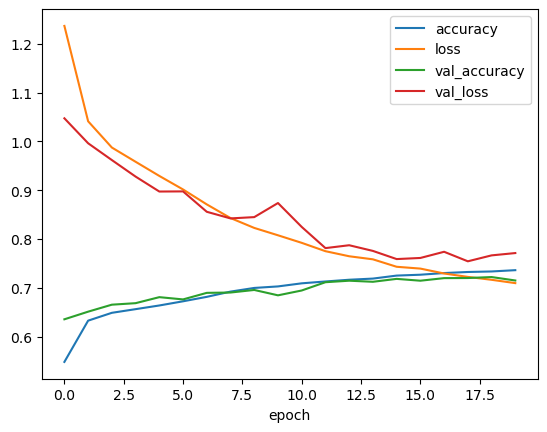

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7787752151489258
Test accuracy: 0.7142227292060852
